# SI 618 Lab 8

In [1]:
import seaborn as sns
import numpy as np
from scipy import stats

Check out some simple datasets available through seaborn:

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

### Q1: Load the car crashes dataset (10 pts)

total: Number of drivers involved in fatal collisions per billion miles

speeding: Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding

alcohol: Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired

not_distracted: Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted

no_previous: Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents

ins_premium: Car Insurance Premiums ($)

ins_losses: Losses incurred by insurance companies for collisions per insured driver ($)

In [3]:
car_data = sns.load_dataset("car_crashes")
car_data.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


### Q2: We would like to understand how total accidents vary across the states. (40pts)
a) Compute mean, standard deviation, and median. 

b) Please make a bar plot to visualize the relationship between states and total accidents. Please use sns.set to adjust the figure size such that the graph could show the detail clearly. 

c) Reset figure size with sns.reset_orig(). Please make a histogram plot to visualize the *distribution* of total accidents.

d) Use the functions we introduced in the lecture to visualize the relationship between the quantiles from the total accidents data and the quantiles from a normal distribution.

In [4]:
# a)

mean = np.mean(car_data["total"])
sd = np.mean(car_data["total"])
med = np.mean(car_data["total"])
print("mean: ", mean, "\nstandard deviation: ", sd, "\nmedian: ", med)

mean:  15.79019607843137 
standard deviation:  15.79019607843137 
median:  15.79019607843137


Text(0.5, 0, 'states')

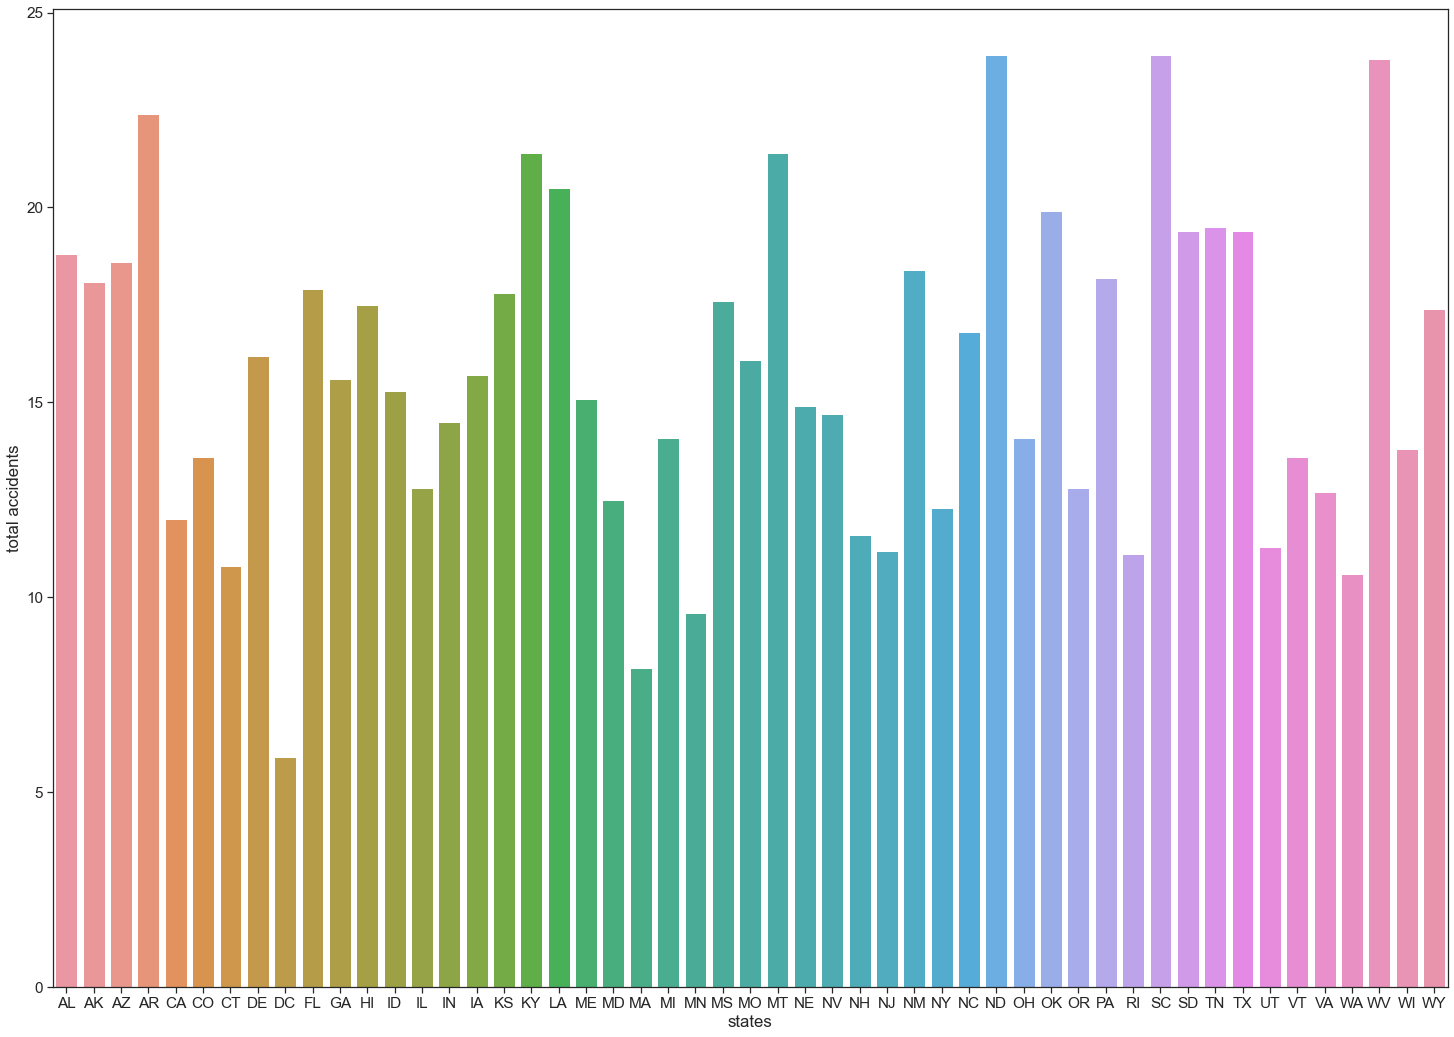

In [5]:
# b)

sns.set(style='white')
sns.set(rc = {'figure.figsize':(25,18)})
sns.set(context='notebook', style='ticks', font_scale=1.4)

ax = sns.barplot(x="abbrev", y="total", data=car_data)
ax.set_ylabel("total accidents")
ax.set_xlabel("states")

/Users/junsi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


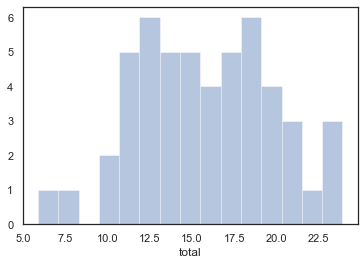

In [6]:
# c)

sns.reset_orig()
sns.set(style='white')
ax1 = sns.distplot(car_data["total"],kde=False,bins=15)

<AxesSubplot:>

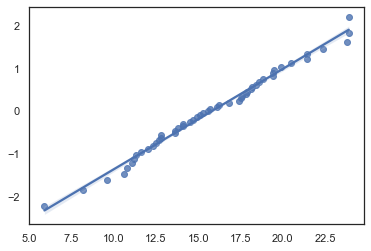

In [7]:
# d)

qntls, xr = stats.probplot(car_data["total"], fit=False)
sns.regplot(x=xr,y=qntls)

### Q3: What is the relationship between total and speeding? Visualize the relationship by plotting the data points with a linear regression model fit. Interpret your findings. (10 pts)

<AxesSubplot:xlabel='speeding', ylabel='total'>

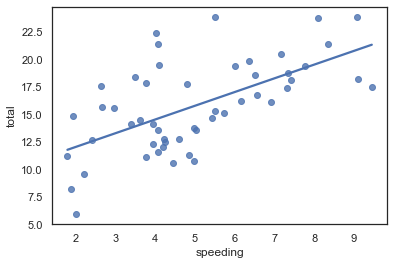

In [8]:
sns.regplot(x="speeding", y="total", data = car_data, ci=False, order=1)

### Interpretation:

From the plot above, we can find that there exists a positive correlation between total and speeding. With the increasing of speeding, the total accidents increases. Besides, the points are almost all around the fitting line, indicating that this linear regression model is relatively convincing.

### Q4: We want to visualize the car insurance premiums data. Please a) make a violin plot in the first graph b) make a box plot and a strip plot together in the second graph. (20 pts)

Text(0.5, 0, 'car insurance premiums')

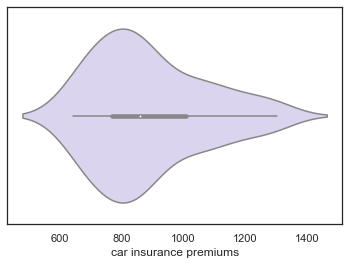

In [9]:
# a)

ax = sns.violinplot(x="ins_premium", data=car_data,color="#d7d0f3")
ax.set_xlabel("car insurance premiums")

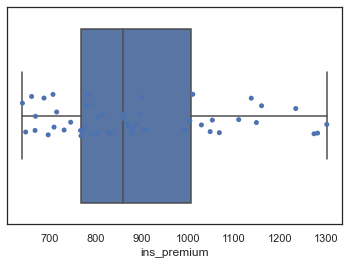

In [10]:
# b)

ax = sns.boxplot(x=car_data["ins_premium"])
ax = sns.stripplot(x=car_data["ins_premium"])

### Q5: What is the relationship between different columns? Use one of the functions we introduced in the lecture to plot the pairwise relationships in the dataset and interpret. What do you see? Which columns have a strong relationship and which do not? (20pts)

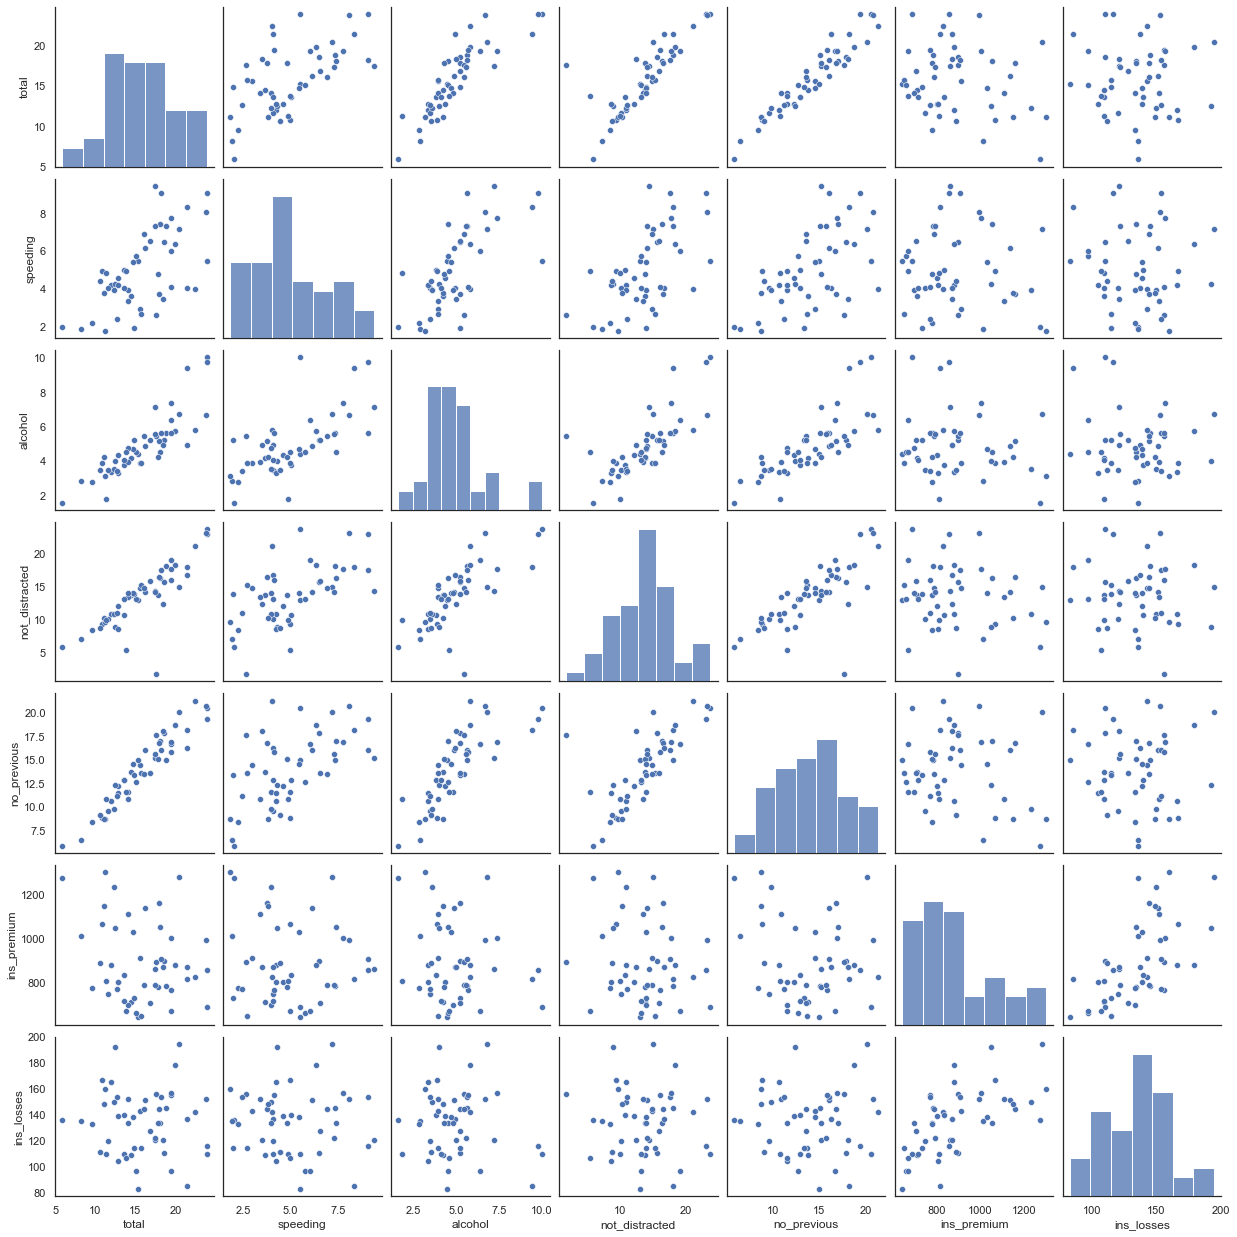

In [11]:
sns.pairplot(car_data)

### Interpretation

According to the plots above, we can find that:

- there exists a positive correlation between `total` and `speeding`, `total` and `alcohol`, `total` and `not_distracted`, `total` and `no_previous`, `speeding` and `alcohol`, `speeding` and `not_distracted`, `alcohol` and `not_distracted`, `alchhol` and `no_previous`, `not_distracted` and `no_previous`, `ins_premium` and `ins_losses`
- there is no obvious relationship between the remaining pairs

Of all the correlated pairs, there are strong relationships between `total` and `alcohol`, `total` and `not_distracted`, `total` and `no_previous`, `alcohol` and `not_distracted`, and `not_distracted` and `no_previous`. The remaining correlated pairs have positive relationships, but not as strong as the five pairs mentioned earlier.

